In [4]:
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
digits = datasets.load_digits()

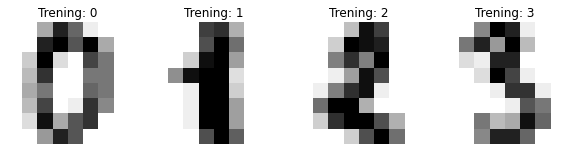

In [6]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f"Trening: {label}")

In [7]:
n_samples = len(digits.images)
n_samples

1797

In [8]:
#tworzenie klasyfikatora
clf = svm.SVC(gamma=0.001)

In [9]:
data = digits.images.reshape((n_samples,-1))

X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

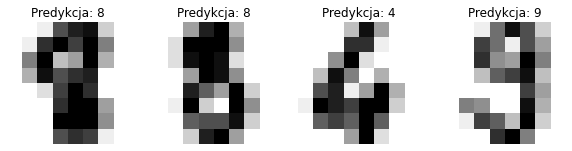

In [10]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f"Predykcja: {prediction}")

In [11]:
#ocena modelu
print(f'raport klasyfikacji dla klasyfiaktora {clf}\n{metrics.classification_report(y_test,predicted)}\n')

raport klasyfikacji dla klasyfiaktora SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Macierz pomyłek!')

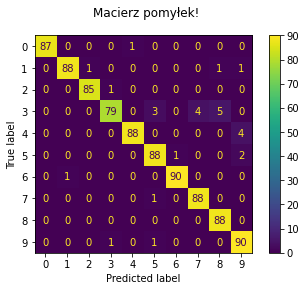

In [12]:
#macierz pomyłek
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek!")